# Test CNN-VAE (reduction) with Fully-Connected Net (prediction)

In [2]:
import os
from os.path import join
import sys
from pathlib import Path

# include app directory into sys.path
parent_dir = Path(os.path.abspath('')).parent
app_dir = join(parent_dir, "app")
if app_dir not in sys.path:
      sys.path.append(app_dir)

import torch as pt
import matplotlib.pyplot as plt
import utils.config as config

plt.rcParams["figure.dpi"] = 180

VAE_PATH = join(parent_dir, "output", "VAE", "latent_study", config.VAE_model)
OUTPUT_PATH = join(parent_dir, "output", "single_flow_cond")
MODEL_PATH = join(parent_dir, "output", "single_flow_cond", "parameter_study")

In [3]:
# load study results
study_results = pt.load(join(MODEL_PATH, "study_results.pt"))
param_combinations = list(study_results.keys())

# find parameter combinations of study and extract test loss
input_width = [int(param_set.split('_')[0]) for param_set in param_combinations]
hidden_size = [int(param_set.split('_')[1]) for param_set in param_combinations]
n_hidden = [int(param_set.split('_')[2]) for param_set in param_combinations]
test_losses = [study_results[param_set][0]["val_loss"].values[-10:].mean() for param_set in param_combinations]

# Sort the indexed losses based on the values (ascending order)
sorted_losses = sorted(list(enumerate(test_losses)), key=lambda x: x[1])
lowest_loss_idx = [index for index, _ in sorted_losses[:5]]

#### Create Scatter Plot

The param combinations with the lowest loss: [input_width, hidden_size, n_hidden]
['40_128_1', '40_512_1', '50_1024_1', '50_32_1', '40_256_1']


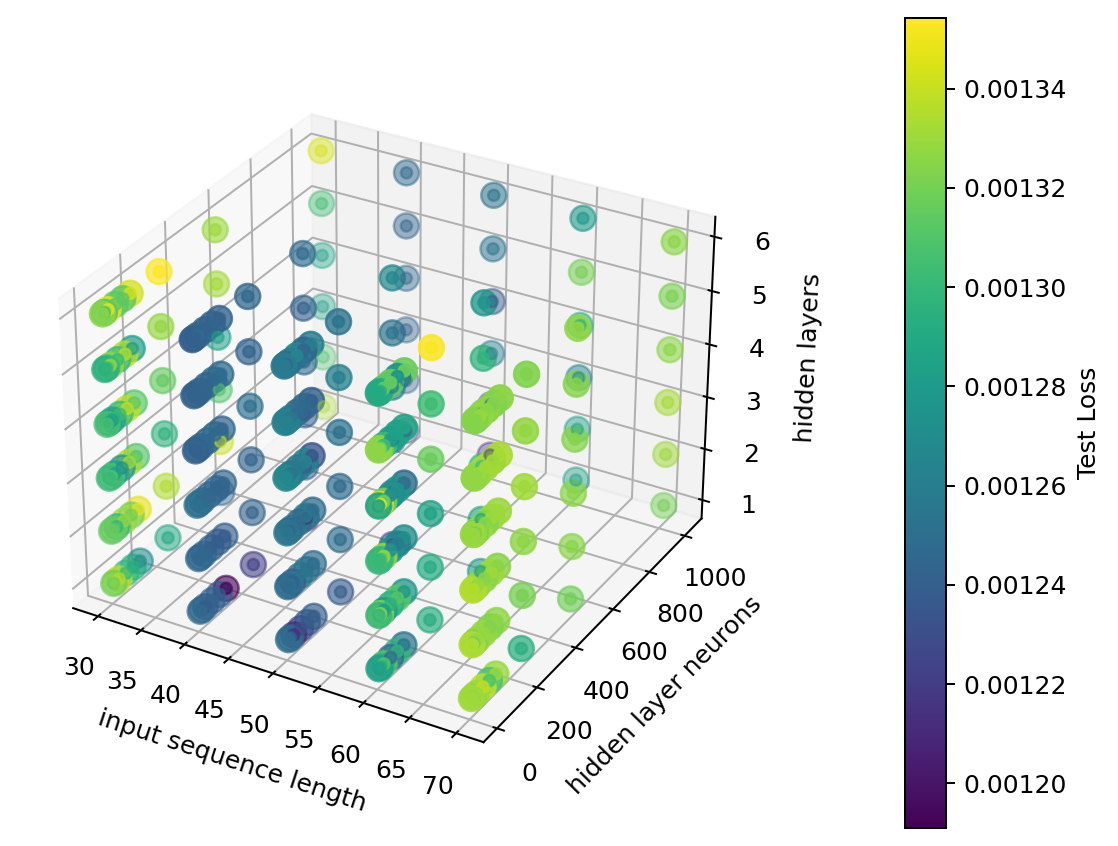

In [4]:
print("The param combinations with the lowest loss: [input_width, hidden_size, n_hidden]")
print([param_combinations[i] for i in lowest_loss_idx]) 

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(input_width, hidden_size, n_hidden, c=test_losses, cmap='viridis', s=100)
ax.set_xlabel("input sequence length")
ax.set_ylabel("hidden layer neurons")
ax.set_zlabel("hidden layers")

cbar = plt.colorbar(ax.scatter(input_width, hidden_size, n_hidden, c=test_losses, cmap='viridis'), pad=0.15)
cbar.set_label('Test Loss')
fig.tight_layout()
fig.savefig(join(OUTPUT_PATH, "VAE_FC_model_param_study"))


In [5]:
# decide on model architecture and increase prediction horizon incrementally

#### Latent Loss vs. Full Space Loss

In [6]:
# compare the latent loss vs the full space MSE

#### Loss vs. Prediction Horizon

In [7]:
# show how the loss of the selected model configuration changes when the prediction horizon increases

#### Test AR prediction

In [8]:
# decide on architecture and predict an arbitrary timestep -> compare to actual timestep